&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="../DATA/corp_logo.jpg" width='160'>

# Histogram

It is possible to show the frequency of values of colors in an image. Each of the tree RGB channels has values between 0 and 255. So, we can plot these as 3 histograms on top of each other to see the **frequency distribution** of each channel.
Check this out for more information: https://www.cambridgeincolour.com/tutorials/histograms1.htm

### Image Histogram with OpenCV
Recall that Matplotlib expects the images in a different RGB ordering vs BGR in OpenCV, so if we use OpenCV to calculate anything channel oriented, we'll want to make sure we keep the original RGB ordering, however if we ever want to display the image, then we'll need to convert to the RGB ordering that matplotlib wants.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Plotting 3 Colors Histogram

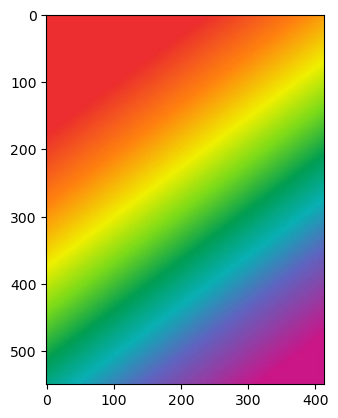

In [2]:
rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)
plt.imshow(show_rainbow)

### OpenCV Histogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. 
* histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges : this is our RANGE. Normally, it is [0,256].

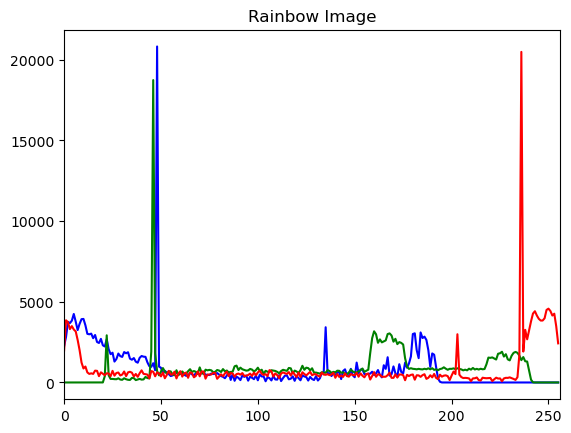

In [3]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

### Masking
It is possible to mask a certain part of the image 


In [4]:
img = rainbow
img.shape

(550, 413, 3)

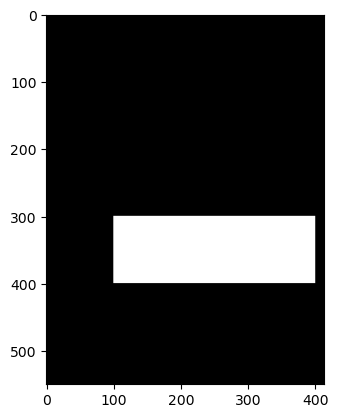

In [6]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255
plt.imshow(mask,cmap='gray')

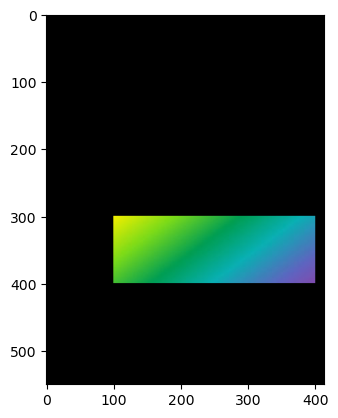

In [7]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask = mask) # Visualizing version
plt.imshow(show_masked_img)

In [8]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'Histogram for RED values of the full image')

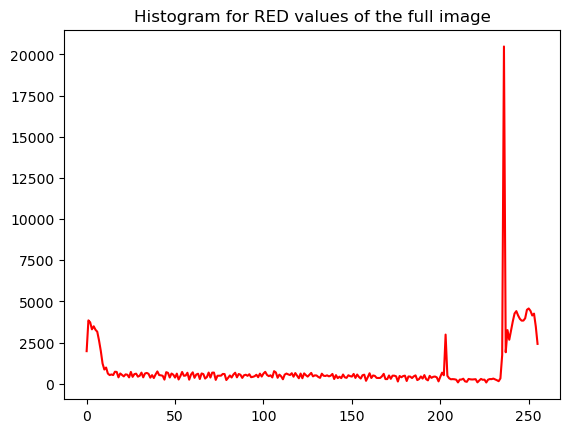

In [12]:
plt.plot(hist_full_values_red, color='red')
plt.title('Histogram for RED values of the full image')

Text(0.5, 1.0, 'Histogram for RED values for the Masked Area')

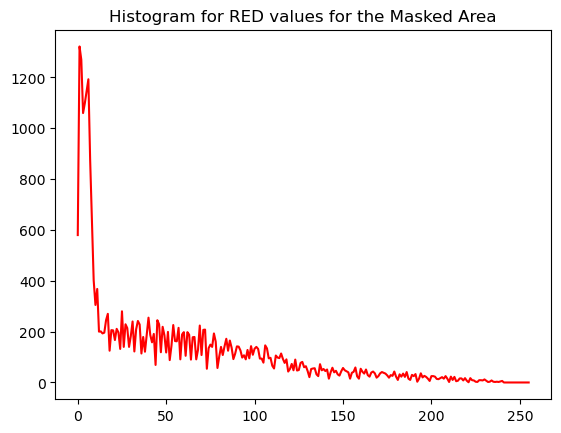

In [11]:
plt.plot(hist_mask_values_red, color='red')
plt.title('Histogram for RED values for the Masked Area')

---

### Histogram Equalization
It is a method of **contrast adjustment** based on image's histogram. Check out this link for more details about math details: https://en.wikipedia.org/wiki/Histogram_equalization

<img src='images/histogram_equalization.png'>

Here is an example of an original image, and applying histogram equalization reduces the color depth(shades of gray):

<img src='images/original_image_equalization.png'>

Here is an original min and max values:

<img src='images/original_minmax_value.png'>

then, Notice that the min and max values have now have been equalized to be between 0 and 255  

<img src='images/original_equalized.png'>

<br>Now let's see it on a normal image and its **corresponding histogram(black)** and **cumulative histogram(red)** and its cumulative histogram

<img src='images/equalize_normal_image.png'>

<img src='images/eualized_normal_image.png'>

After equalizing, it is clear that the cumulative histogram shaped **more linearly**.

<br>

In [18]:
quail = cv2.imread('../DATA/00_quail.jpg',0)

In [19]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

### Single Channel(Grayscale)

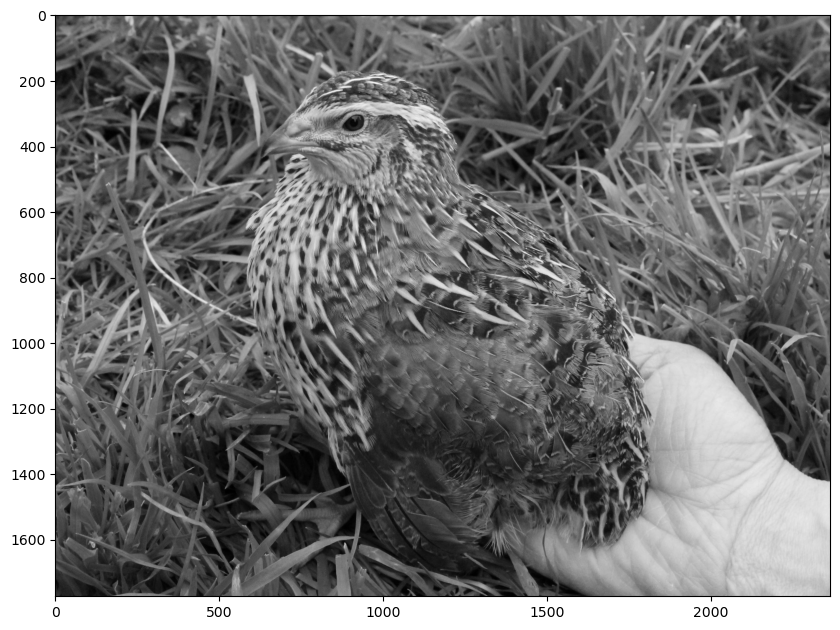

In [20]:
display(quail,cmap='gray')

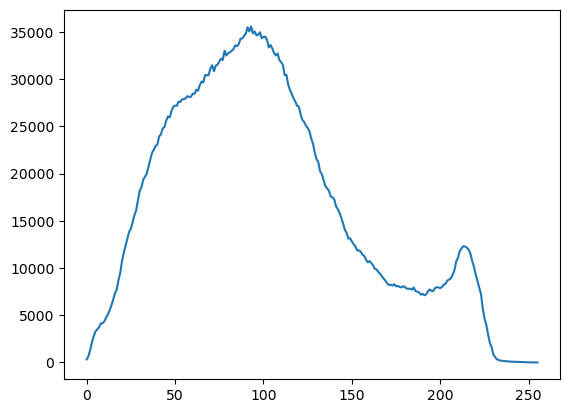

In [21]:
hist_values = cv2.calcHist([quail],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

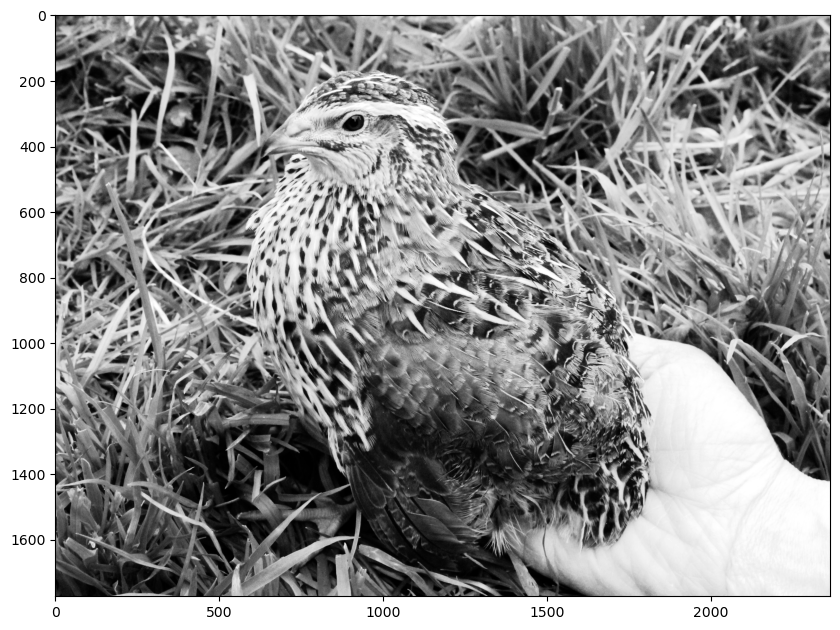

In [22]:
eq_gorilla = cv2.equalizeHist(quail)
display(eq_gorilla,cmap='gray')

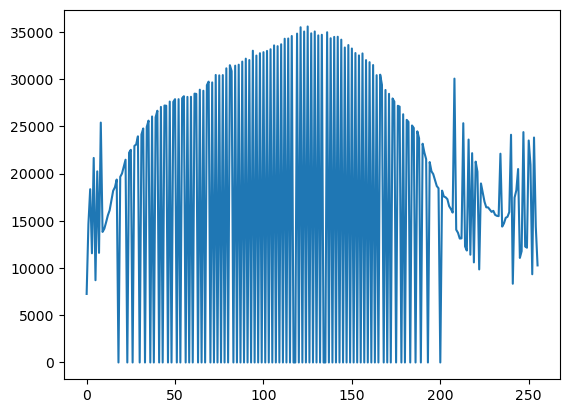

In [23]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

### Color Image

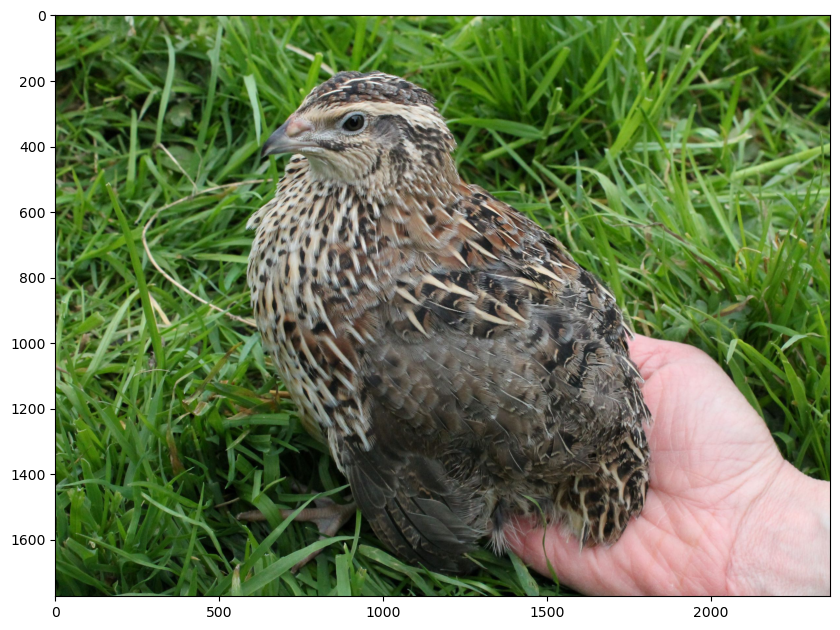

In [27]:
color_quail = cv2.imread('../DATA/00_quail.jpg')
show_quail = cv2.cvtColor(color_quail,cv2.COLOR_BGR2RGB)
# Convert to HSV colorspace (The way that OpenCV works)
hsv = cv2.cvtColor(color_quail, cv2.COLOR_BGR2HSV)

display(show_quail)

In [28]:
# Grab V channel
hsv[:,:,2]

array([[100, 105, 102, ..., 152, 152, 151],
       [ 99, 103, 101, ..., 155, 154, 156],
       [ 97, 101, 100, ..., 154, 153, 153],
       ...,
       [ 59,  64,  69, ..., 189, 189, 189],
       [ 61,  65,  70, ..., 190, 190, 190],
       [ 65,  67,  71, ..., 192, 192, 191]], dtype=uint8)

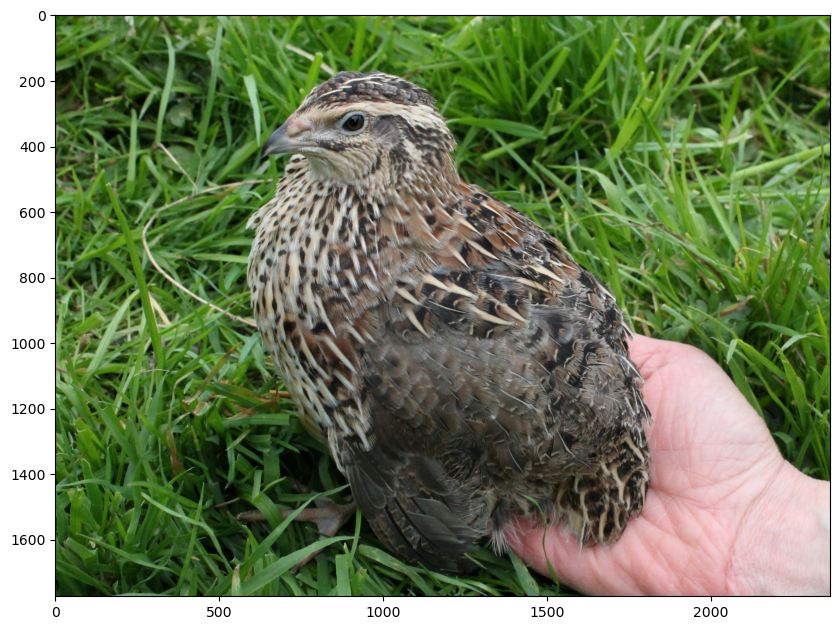

In [29]:
# Convert back to RGB to visualize
eq_color_quail = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_quail)